# Bayesian learning

This code uses the simple bayesian approach and aposteriori probability principles to understand whether the given height can be of male or female.


## Bayes' theorem

\begin{equation}\label{eq:bayes}
  P(h|D) = \frac{P(D|h) P(h)}{P(D)}
\end{equation}


 * $P(h)$ = prior probability of hypothesis $h$ (e.g. a class)
 * $P(D)$ = prior probability of observation (data) $D$
 * $P(h|D)$ = probability of $c$ given $D$
 * $P(D|h)$ = probability of $D$ given $h$
 
 $D$ is your measurement or data!

### Classification

We want to select the class with the highest Bayes (a posteriori) probability given the measurement $D$.

*Maximum a posteriori* hypothesis $h_{MAP}$:
\begin{eqnarray}
  & h_{MAP} & = \arg \max_{c \in C} P(c|D)\nonumber \\
  & & = \arg \max_{c \in C} \frac{P(D|c) P(c)}{P(D)} \nonumber \\
  & & = \arg \max_{c \in C}P(D|c) P(c) \nonumber
\end{eqnarray}

### Maximum likelihood vs. maximum a posteriori

If assume equal priories, $P(h_{i})=P(h_{j})$, then the optimal decision simplies to
the *maximum likelihood* (ML) classification
\begin{equation}\label{eq:mlhypothesis}
  h_{ML} = \arg \max_{h_{i} \in C} P(D|h_{i})
\end{equation}

## Basic formulas for probabilities

* Product Rule: probability $P(A \land B)$ of a conjunction of two events
A and B:
\begin{equation}
P(A \land B) = P(A|B) P(B) = P(B|A) P(A)
\end{equation}

* Sum Rule: probability of a disjunction of two events A and B:
\begin{equation}
P(A \lor B) = P(A) + P(B) - P(A \land B)
\end{equation}

* Theorem of total probability: if events $A_{1}, \ldots, A_{n}$ are mutually exclusive with $\sum_{i = 1}^{n} P(A_{i}) = 1$, then
\begin{equation}
P(B) = \sum_{i = 1}^{n} P(B|A_{i}) P(A_{i})
\end{equation}

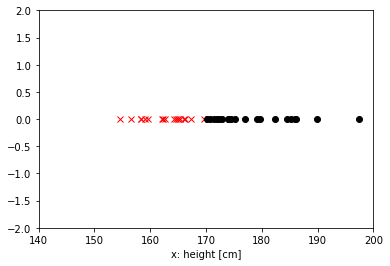

In [1]:
# Let's have a bayesien look on the male/female classification problem
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('x: height [cm]')
plt.axis([140,200,-2,2])
x_1 = np.random.normal(165,5,20) # Measurements from the class 1
x_2 = np.random.normal(180,6,20) # Measurements from the class 2
plt.plot(x_1,np.zeros(len(x_1)),'rx')
plt.plot(x_2,np.zeros(len(x_2)),'ko')
plt.show()

[164.21296544094864, 177.8244186313693, 4.614654891110036, 5.276973047307949]


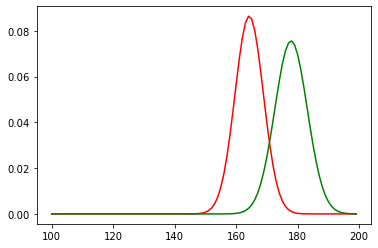

In [2]:
# Let's model the measurement data as Gaussians (normal distribution)
import scipy.stats as stats
mu1 = np.mean(x_1)
mu2 = np.mean(x_2)
sigma1 = np.std(x_1)
sigma2 = np.std(x_2)
x = np.arange(100,200,1)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1),'r-')
plt.plot(x, stats.norm.pdf(x, mu2, sigma2),'g-')
print([mu1,mu2,sigma1,sigma2])

[164.21296544094864, 177.8244186313693, 4.614654891110036, 5.276973047307949]


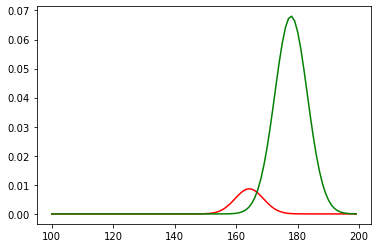

In [3]:
# The same plot with priors (change priori_1 to understand its meaning)
priori_1 = 0.1
priori_2 = 1-priori_1
plt.plot(x, priori_1*stats.norm.pdf(x, mu1, sigma1),'r-')
plt.plot(x, priori_2*stats.norm.pdf(x, mu2, sigma2),'g-')
print([mu1,mu2,sigma1,sigma2])

Decision boundary at 171 cm


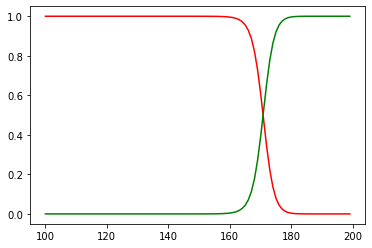

In [4]:
# Let's study posteriori probabilities using Bayes rule
priori_1 = 0.5
priori_2 = 1.0-priori_1
# I use the Bayes theorem to calculate the posteriori probabilities
posteriori_1 = stats.norm.pdf(x, mu1, sigma1)*priori_1/(stats.norm.pdf(x, mu1, sigma1)*priori_1+stats.norm.pdf(x, mu2, sigma2)*priori_2)
posteriori_2 = stats.norm.pdf(x, mu2, sigma2)*priori_2/(stats.norm.pdf(x, mu1, sigma1)*priori_1+stats.norm.pdf(x, mu2, sigma2)*priori_2)
x_d = np.argmin(np.abs(posteriori_1-posteriori_2)) # note: only approximate point
print(f"Decision boundary at {x[x_d]} cm")
plt.plot(x, posteriori_1,'r-')
plt.plot(x, posteriori_2,'g-')